In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
a = 5
b = 3
sigma_obs = 1

In [4]:
def gaussian(x, mu, lambda_):
    y = 1/np.sqrt(2*np.pi*lambda_**(-1))*np.exp(-lambda_*(x-mu)**2)
    return y

def noise_linear(x, a, b, sigma_obs):
    y = a*x+b+normal(0, sigma_obs, x.shape[0])
    return y

In [5]:
x_pred = np.linspace(2, 8, 1000)

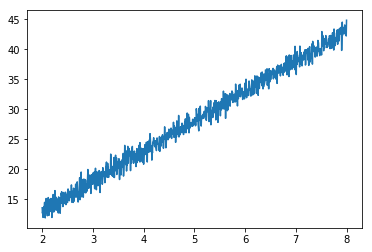

In [11]:
plt.plot(x_pred, noise_linear(x_pred, a, b, sigma_obs))
plt.savefig("output.png")

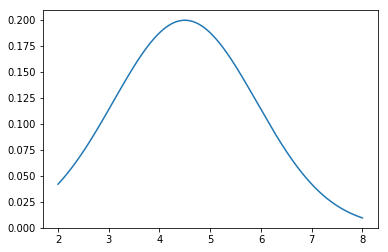

In [7]:
pre_mu = 4.5
pre_sigma = 2
plt.plot(x_pred, gaussian(x_pred, pre_mu, 1/pre_sigma**2))

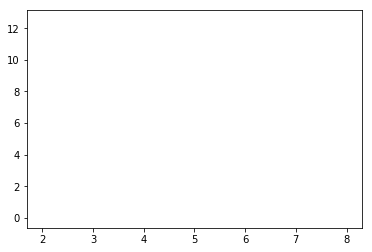

In [8]:
data_x = 5*(np.random.rand(500)-0.5)
data_y = noise_linear(data_x, a, b, sigma_obs)

sigma_list = []
mu_list = []
ims = []
fig = plt.figure()

pri_lambda_ = 1/pre_sigma**2
pri_mu_tmp = 1/pre_sigma**2*pre_mu
pri_mu = pri_mu_tmp/pri_lambda_

im = plt.plot(x_pred, gaussian(x_pred, pri_mu, pri_lambda_),  color="B")
ims.append(im)

sigma_list.append(1/np.sqrt(pri_lambda_))
mu_list.append(pri_mu)
for x, y in zip(data_x, data_y):
    pri_lambda_ += 1/sigma_obs**2 * x**2
    pri_mu_tmp += 1/sigma_obs**2 * x * y
    pri_mu = pri_mu_tmp / pri_lambda_
    mu_list.append(pri_mu)
    sigma_list.append(1/np.sqrt(pri_lambda_))
    im = plt.plot(x_pred, gaussian(x_pred, pri_mu, pri_lambda_), color="B")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=50)
HTML(ani.to_jshtml())



In [9]:
ani.save("output.gif", writer="imagemagick")

MovieWriter imagemagick unavailable.
